In [181]:
#import needed modules
import pandas as pd
import numpy as np
import sklearn
import matplotlib as plt

In [182]:
col_names= [ 'patient', 'Age','Partner_Score','Self_Score','P_S','victim','PH_Score','PY_Score','E_Score','S_Score']

In [183]:
#importing first model-survey results
m1 = pd.read_csv("model - m1.csv", header= 0, names= col_names)

#iporting 2nd model-survey results
m2 = pd.read_csv("model - m2.csv", header= 0, names= col_names)


In [184]:
vict=pd.concat([m1,m2])

In [185]:
#verify merge
vict.head()

,patient,Age,Partner_Score,Self_Score,P_S,victim,PH_Score,PY_Score,E_Score,S_Score
0,1,35,2,2,4,Yes,5,2,2,0
1,2,38,0,5,5,Yes,1,6,4,5
2,3,20,1,1,2,Yes,6,0,0,4
3,4,16,2,5,7,Yes,2,5,4,4
4,5,34,5,2,7,Yes,3,4,6,6


In [186]:
vict.corr()

,patient,Age,Partner_Score,Self_Score,P_S,PH_Score,PY_Score,E_Score,S_Score
patient,1.000000,-0.059528,-0.305124,-0.479716,-0.533727,-0.426332,-0.380836,-0.240938,-0.327583
Age,-0.059528,1.000000,0.005412,0.062258,0.047668,-0.031748,0.020260,0.003736,-0.015922
Partner_Score,-0.305124,0.005412,1.000000,0.106541,0.707531,0.128453,0.101259,0.165627,0.163475
Self_Score,-0.479716,0.062258,0.106541,1.000000,0.778042,0.327022,0.264606,0.015809,0.135486
P_S,-0.533727,0.047668,0.707531,0.778042,1.000000,0.313581,0.252039,0.115881,0.199579
PH_Score,-0.426332,-0.031748,0.128453,0.327022,0.313581,1.000000,0.199508,0.106011,0.173917
PY_Score,-0.380836,0.020260,0.101259,0.264606,0.252039,0.199508,1.000000,0.105377,0.252579
E_Score,-0.240938,0.003736,0.165627,0.015809,0.115881,0.106011,0.105377,1.000000,0.243623
S_Score,-0.327583,-0.015922,0.163475,0.135486,0.199579,0.173917,0.252579,0.243623,1.000000


<module 'matplotlib' from '/opt/tljh/user/lib/python3.6/site-packages/matplotlib/__init__.py'>

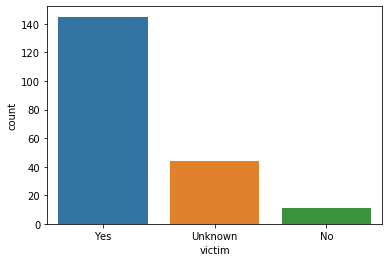

In [188]:
import seaborn as sns
sns.countplot(vict['victim'],label="Count")
plt

In [189]:
#convert victim dtype to category from object in order to encode
vict["victim"] = vict["victim"].astype('category')

In [190]:
#recode victim column
#label encoder column victim
vict["victim_cat"] = vict["victim"].cat.codes

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  import sys


AttributeError: module 'matplotlib' has no attribute 'subtitle'

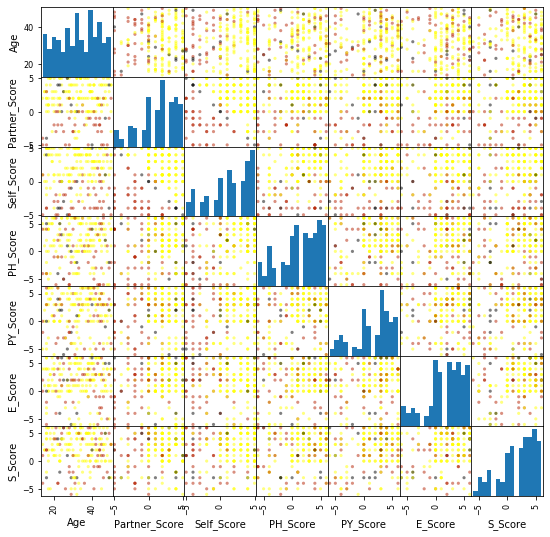

In [191]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['Age', 'Partner_Score', 'Self_Score', 'PH_Score','PY_Score','E_Score','S_Score']
X = vict[feature_names]
y = vict['victim_cat']
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=10, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.subtitle('Scatter-matrix for each input variable')
plt.savefig('victim_scatter_matrix')

In [192]:
vict.corr()

,patient,Age,Partner_Score,Self_Score,P_S,PH_Score,PY_Score,E_Score,S_Score,victim_cat
patient,1.000000,-0.059528,-0.305124,-0.479716,-0.533727,-0.426332,-0.380836,-0.240938,-0.327583,-0.389267
Age,-0.059528,1.000000,0.005412,0.062258,0.047668,-0.031748,0.020260,0.003736,-0.015922,0.010667
Partner_Score,-0.305124,0.005412,1.000000,0.106541,0.707531,0.128453,0.101259,0.165627,0.163475,0.438666
Self_Score,-0.479716,0.062258,0.106541,1.000000,0.778042,0.327022,0.264606,0.015809,0.135486,0.588091
P_S,-0.533727,0.047668,0.707531,0.778042,1.000000,0.313581,0.252039,0.115881,0.199579,0.695126
PH_Score,-0.426332,-0.031748,0.128453,0.327022,0.313581,1.000000,0.199508,0.106011,0.173917,0.235000
PY_Score,-0.380836,0.020260,0.101259,0.264606,0.252039,0.199508,1.000000,0.105377,0.252579,0.180686
E_Score,-0.240938,0.003736,0.165627,0.015809,0.115881,0.106011,0.105377,1.000000,0.243623,0.081528
S_Score,-0.327583,-0.015922,0.163475,0.135486,0.199579,0.173917,0.252579,0.243623,1.000000,0.175391
victim_cat,-0.389267,0.010667,0.438666,0.588091,0.695126,0.235000,0.180686,0.081528,0.175391,1.000000


Age shows the lowest correlation with victim catergory. This addresses the exploratory objetive pertaining to whether or not age is a factor in oe being more susceptible to being a victime of domestic violence. Additionally some o the particpints were identified as victim in the prescreening section but later identified as a type of victim when they answered questions regarding the four different type of abuse. Partner_Score and Self_SCore have a higher correlation with victim category compred to PH_Score, PY_SCore, E_SCore and S_Score. P_S score has the highest correlation because it is the sum of Partner_Score and SElf_SCore. The rule I generated was that in order to identify a victim as Yes, No or Unknown t would be based on the score of both the Partner and Self. The four abuse types are not mutually exclusive thus a patient could be identified as more than one type of abuse victim. Due to the special condition of each abuse type further assessment would be required which is why the next step of this capstone requires dropping all four abuse types. After patient has been identified the referral method is to a dometic violence center which enables further victim assessment.

In [193]:

#Feature Importance among the variables using ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#Check the top 3 features with highest score
feat_importances.nlargest(3).plot(kind='barh')
plt.title('Top 3 most important features')
plt.show()

NameError: name 'ExtraTreesClassifier' is not defined

In [141]:
#drop last 4 columns in new df
#create new df to only identify victim = yes / no/unknown
vict1= vict.drop(columns=['patient','PH_Score','PY_Score','E_Score','S_Score'], axis=0)

In [142]:
#verify colunms succefully dropped
vict1.head()

,Age,Partner_Score,Self_Score,P_S,victim,victim_cat
0,35,2,2,4,Yes,2
1,38,0,5,5,Yes,2
2,20,1,1,2,Yes,2
3,16,2,5,7,Yes,2
4,34,5,2,7,Yes,2


In [143]:
vict1.iloc[:10]

,Age,Partner_Score,Self_Score,P_S,victim,victim_cat
0,35,2,2,4,Yes,2
1,38,0,5,5,Yes,2
2,20,1,1,2,Yes,2
3,16,2,5,7,Yes,2
4,34,5,2,7,Yes,2
5,28,3,1,4,Yes,2
6,35,1,0,1,Unknown,1
7,23,2,4,6,Yes,2
8,28,4,0,4,Yes,2
9,31,0,5,5,Yes,2


In [144]:
#verify successful encoding
vict1.head()
#drop column victim to have all int64 dtype
vict1= vict1.drop(columns=['victim'])

In [145]:
#verify victim column was successfully dropped
#verify dtype int64 for all
vict1.head()

,Age,Partner_Score,Self_Score,P_S,victim_cat
0,35,2,2,4,2
1,38,0,5,5,2
2,20,1,1,2,2
3,16,2,5,7,2
4,34,5,2,7,2


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  import sys


AttributeError: module 'matplotlib' has no attribute 'subtitle'

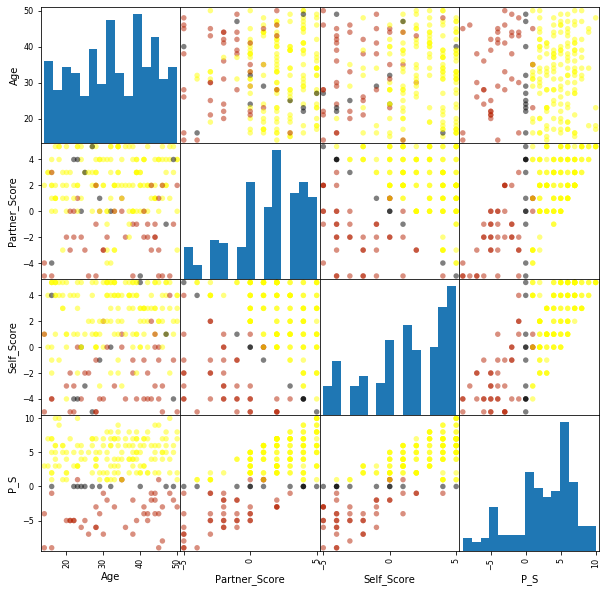

In [169]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['Age', 'Partner_Score', 'Self_Score','P_S']
X = vict1[feature_names]
y = vict1['victim_cat']
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=30, hist_kwds={'bins':15}, figsize=(10,10), cmap = cmap)
plt.subtitle('Scatter-matrix for each input variable')
plt.savefig('victim_scatter_matrix')

In [174]:
vict1.corr()

,Age,Partner_Score,Self_Score,P_S,victim_cat
Age,1.000000,0.005412,0.062258,0.047668,0.010667
Partner_Score,0.005412,1.000000,0.106541,0.707531,0.438666
Self_Score,0.062258,0.106541,1.000000,0.778042,0.588091
P_S,0.047668,0.707531,0.778042,1.000000,0.695126
victim_cat,0.010667,0.438666,0.588091,0.695126,1.000000


In [160]:
label_names=['Yes','No','Unknown']

In [161]:
feature_names=['Age','Partner_Score','Self_Score','P_S']

In [162]:
# Organize data
label_names = label_names
labels = vict1.iloc[:, 3].values
feature_names = feature_names
features = vict1.iloc[:, -1].values

In [163]:
# Look at our data
print(label_names)
print(labels[0])
print(feature_names[0])
print(features[0])

['Yes', 'No', 'Unknown']
4
Age
2


In [31]:
vict1['victim_cat'].head()

0    2
1    2
2    2
3    2
4    2
Name: victim_cat, dtype: int8

In [32]:
vict1['victim_cat'].tail()

95    2
96    1
97    2
98    2
99    1
Name: victim_cat, dtype: int8

In [33]:
#print shape of new data
print(vict1.shape)

(200, 5)


In [123]:
#verify if data is balanced
print(vict1.groupby('victim_cat').size())

victim_cat
0     11
1     44
2    145
dtype: int64


### Victim identified = No (11)
### Victime identified= Unknown (44)
### Victim identified= Yes (145)

In [124]:
print(vict.groupby('Age').size())

Age
14    3
15    2
16    9
17    6
18    3
19    4
20    6
21    3
22    5
23    7
24    5
25    3
26    2
27    5
28    9
29    5
30    5
31    7
32    7
33    7
34    7
35    5
36    3
37    5
38    8
39    8
40    6
41    7
42    6
43    4
44    8
45    6
46    6
47    5
48    4
49    4
50    5
dtype: int64


In [162]:
vict1.head()

,Age,Partner_Score,Self_Score,P_S,victim_cat
0,35,2,2,4,2
1,38,0,5,5,2
2,20,1,1,2,2
3,16,2,5,7,2
4,34,5,2,7,2


In [35]:
vict1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 99
Data columns (total 5 columns):
Age              200 non-null int64
Partner_Score    200 non-null int64
Self_Score       200 non-null int64
P_S              200 non-null int64
victim_cat       200 non-null int8
dtypes: int64(4), int8(1)
memory usage: 8.0 KB


In [36]:
vict1.describe()

,Age,Partner_Score,Self_Score,P_S,victim_cat
count,200.000000,200.00000,200.000000,200.000000,200.000000
mean,32.735000,1.32000,1.315000,2.635000,1.670000
std,10.215998,2.72299,3.063117,4.309832,0.576857
min,14.000000,-5.00000,-5.000000,-9.000000,0.000000
25%,24.000000,0.00000,-1.000000,0.000000,1.000000
50%,33.000000,2.00000,2.000000,3.000000,2.000000
75%,41.000000,3.25000,4.000000,6.000000,2.000000
max,50.000000,5.00000,5.000000,10.000000,2.000000


In [79]:
#assign features to variable x
X = vict1.iloc[:, -1].values 

In [62]:
print(X)

[2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 0 1 1 2 1 0 2 1 2
 1 2 1 1 2 2 2 0 1 0 0 2 2 2 1 1 2 1 2 2 1 0 2 2 1 2 1 2 2 2 2 1 1 2 2 1 2
 1 2 2 2 2 2 2 0 2 1 2 2 1 1 2 2 2 2 2 0 1 1 1 2 2 1 2 1 2 2 1 2 1 1 1 1 1
 0 2 1 0 1 1 2 1 1 2 2 1 2 2 1]


In [80]:
#assign target variable
y = vict1.iloc[:, 3].values 

In [64]:
print(y)

[ 4  5  2  7  7  4  1  6  4  5  6  9  2  7  3  3  6  9  3  6  7  5  5  1
  5  8  7  4  6  4  6  6  2 10  2  9  4  6  8  6  2  7  7  0  6  6  3  3
  4  5  4  4  3  6  7  7  2  2  1  6  7  2  6 10  7  3  3  8  4  5  4  4
  5  4  7  2  8  4  7  5  5  5  6  9  8  5  6  7  4  7  1  5  8  4 10  5
  8  3  3  6  7 -7  0 -4 -2  6 -3  0 10 -1  8 -1  1 -2 -1  3  7  1  0 -9
  0  0  4  4  7 -3 -9  2 -5  4  5 -5  0  1  3 -4  1 -6  3  2  3  7 -4 -1
  5  3 -4  2 -2  2  6  7  1  5  3  0  6 -7  1  2 -9 -7  7  1  5  2  3  0
 -5 -4 -5  5  1 -4  2 -5  2  2 -5  6 -5 -1 -8 -2 -3  0  1 -3  0 -6 -3  7
 -6 -5  1  2 -6  5  2 -2]


In [83]:
X.reshape(1,-1)

array([[2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1,
        2, 1, 2, 1, 1, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1,
        0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
        2, 0, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 1,
        2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2,
        2, 1]], dtype=int8)

In [84]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

In [85]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[2. 2. 0. 2. 1. 2. 2. 2. 1. 2. 2. 2. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 0.
 2. 1. 2. 1. 1. 1. 2. 2. 0. 2. 1. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2.
 2. 2. 1. 2. 2. 0. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 2. 2. 0. 1. 2.
 2. 2. 1. 2. 2. 2. 2. 2. 2. 0. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 2.
 2. 2. 0. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 0. 2. 0. 2. 2. 2. 1. 2.
 1. 2. 0. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [87]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [60]:

from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [53]:
from sklearn.model_selection import KFold 
#kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

Train: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199] Validation: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85